<a href="https://colab.research.google.com/github/Mulac/TDA-SentimentAnalysis/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code altered from
https://github.com/mdipietro09/DataScience_ArtificialIntelligence_Utils/blob/master/natural_language_processing/example_text_classification.ipynb <br>
**Add the Tweets.csv to the files section on the left**

In [128]:
# Data
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from PIL import Image

# Explainer
# from lime import lime_text

# sklearn functions for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection, metrics


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Prepare Data
Load the data from a csv into a pandas dataframe

In [129]:
dtf = pd.read_csv("Tweets.csv")
dtf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Preprocessing
The function below preprocesses the tweets by doing the following:

  1. CLEAN - converting the text to lowercase and remove punctuation
  2. TOKENISE - convert string to a list of words
  3. STOPWORDS - remove stopwords if set to true
  4. STEMMING - removes suffixes if set to true
  5. LEMMATISATION - convert to root word if set to true


In [130]:
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):

  #Clean
  text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

  #Tokenise
  lst_text = text.split()

  #remove Stopwords
  if lst_stopwords is not None:
    lst_text = [word for word in lst_text if word not in lst_stopwords]

  #Stemming
  if flg_stemm:
    ps = nltk.stem.porter.PorterStemmer()
    lst_text = [ps.stem(word) for word in lst_text]

  #Lemmatisation
  if flg_lemm:
    lem=nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]

  #rejoin the string
  text = " ".join(lst_text)
  return text

lst_stopwords = nltk.corpus.stopwords.words("english")
airline_stopwords = ["united", "americanair", "usairways", "jetblue", "virginamerica", "southwestair", "thanks", "thnx", "thank you", "flight", "thank", "get", "please", "u"]
for stopword in airline_stopwords:
  lst_stopwords.append(stopword)

In [131]:
dtf["text_clean"] = dtf["text"].apply(lambda x: preprocess_text(x, flg_lemm=True, lst_stopwords=lst_stopwords))

- A bar chart to show the amount of tweets for the different airlines

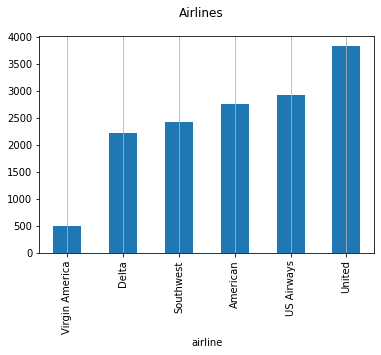

In [132]:
fig, ax = plt.subplots()
fig.suptitle("Airlines", fontsize=12)
dtf["airline"].reset_index().groupby("airline").count().sort_values(by="index").plot(kind="bar", legend=False, ax=ax).grid(axis='x')
plt.show()

In [133]:
def graphSentiment(name, airline):
  fig, ax = plt.subplots()
  fig.suptitle(name + " Sentiment Distribution", fontsize=12)
  airline["airline_sentiment"].reset_index().groupby("airline_sentiment").count().sort_values(by="index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
  plt.show()

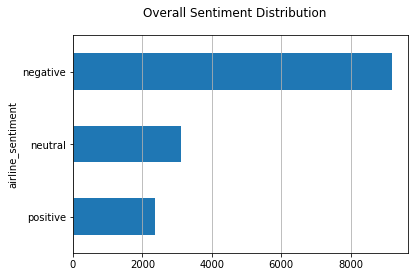

In [134]:
graphSentiment("Overall", dtf)

Spliting the data by the different airlines

In [135]:
dtf_VA = dtf[dtf["airline"]=="Virgin America"]
dtf_delta = dtf[dtf["airline"]=="Delta"]
dtf_southwest = dtf[dtf["airline"]=="Southwest"]
dtf_american = dtf[dtf["airline"]=="American"]
dtf_UA = dtf[dtf["airline"]=="US Airways"]
dtf_united = dtf[dtf["airline"]=="United"]

Sentiment distribution for each of the airlines

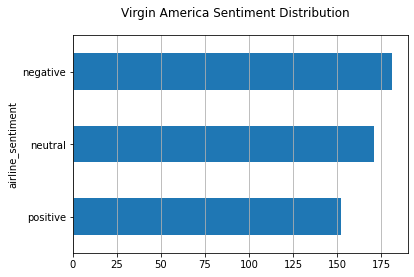

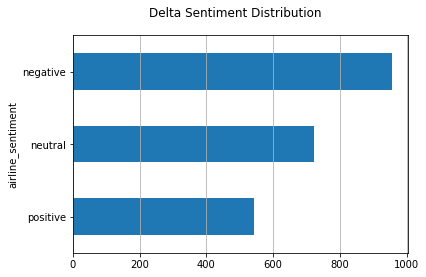

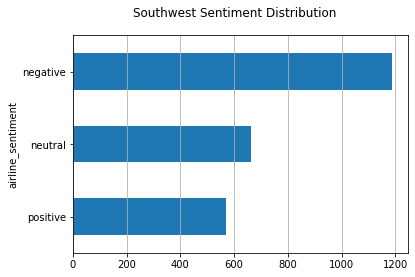

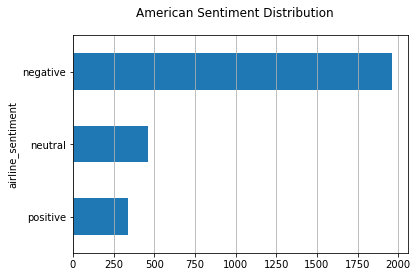

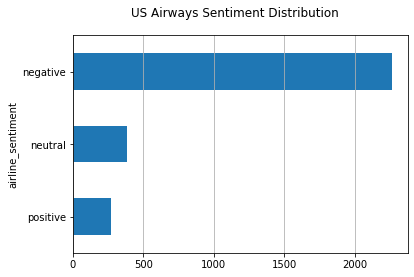

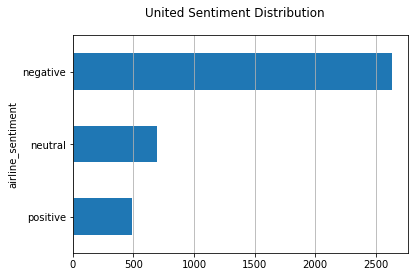

In [136]:
graphSentiment("Virgin America", dtf_VA)
graphSentiment("Delta", dtf_delta)
graphSentiment("Southwest", dtf_southwest)
graphSentiment("American", dtf_american)
graphSentiment("US Airways", dtf_UA)
graphSentiment("United", dtf_united)

# Bag of Words
- using **term frequency-inverse document frequency** (Tf-Idf) to find the values of words in the tweet
 - unigrams and bigrams are included in the model
- The vocabulary orginally has 10,000 features
- The number of features is then reduced
  - key features are determined using a chi-squared test



				########UNITED########
873
# negative:
  . selected features: 122
  . top features: hi,cheer,delayed,follow,hour,following,appreciate,great,dm,worst
 
# neutral:
  . selected features: 295
  . top features: hi,dfw,avgeek,confirmation,dm,following,january,whats,calgary,child
 
# positive:
  . selected features: 546
  . top features: great,appreciate,amazing,good,wonderful,much,great customer,appreciated,thx,great service
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


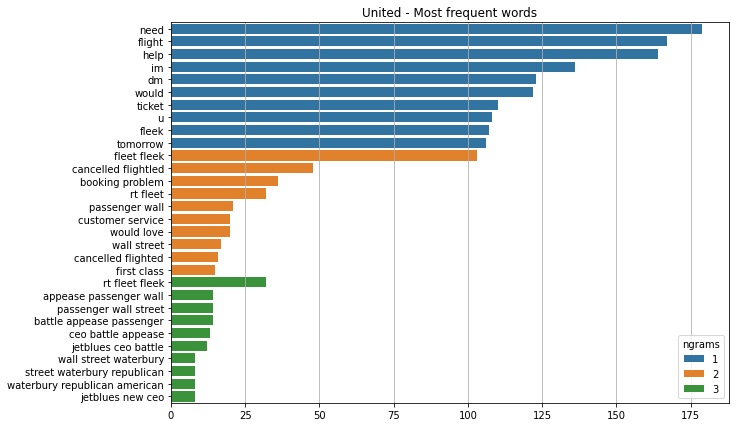

# positive:


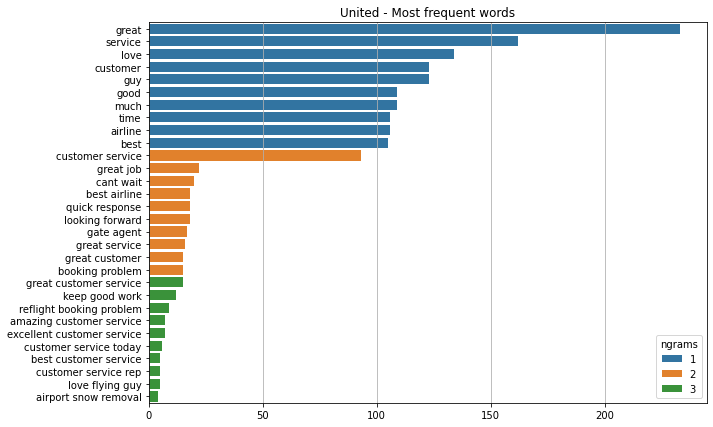

# negative:


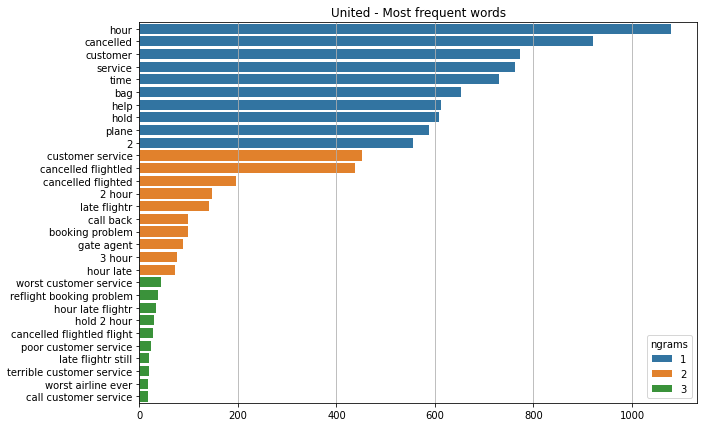






				########VIRGIN AMERICA########
15
# negative:
  . selected features: 9
  . top features: website,email,delayed,suck,checkin,site,check,broken,cancelled
 
# neutral:
  . selected features: 1
  . top features: flight
 
# positive:
  . selected features: 5
  . top features: love,great,cool,absolutely,ssal
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


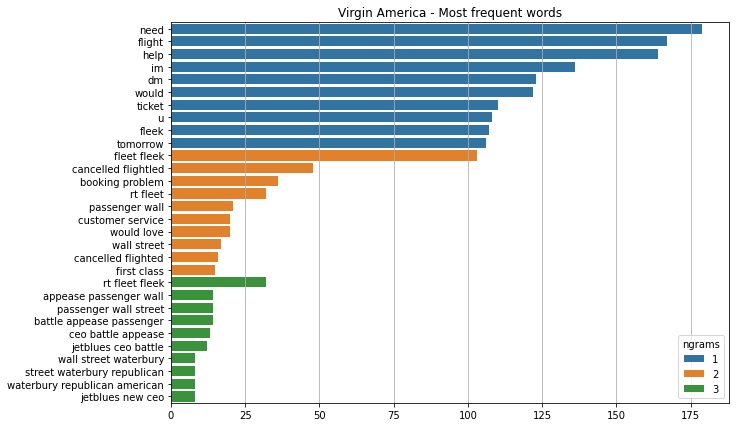

# positive:


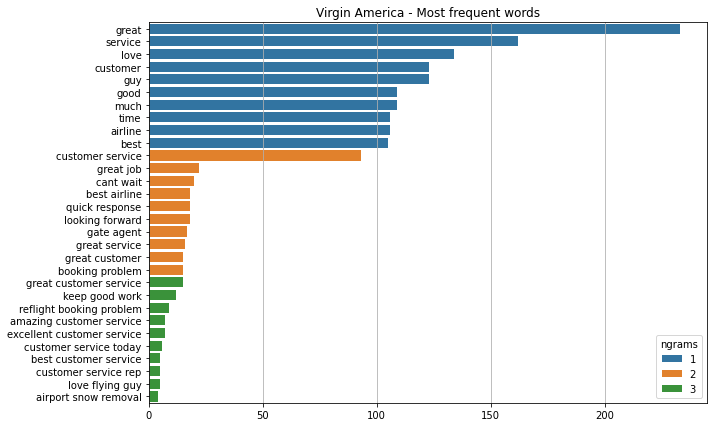

# negative:


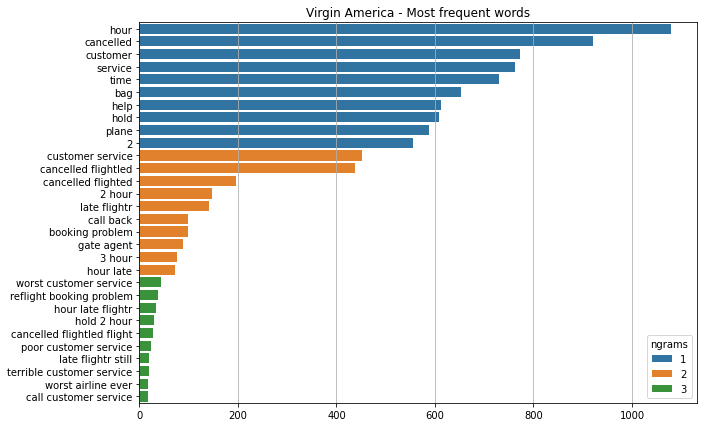






			########US Airways########
1216
# negative:
  . selected features: 158
  . top features: follow,great,amazing,ok,hour,best,following,hold,name,airway follow
 
# neutral:
  . selected features: 538
  . top features: following,baby,228,228 well,reminder,reminder 228,well tweeting,general,idea,advisory
 
# positive:
  . selected features: 656
  . top features: great,amazing,best,follow,awesome,kudos,airway follow,best airway,wonderful,safely
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


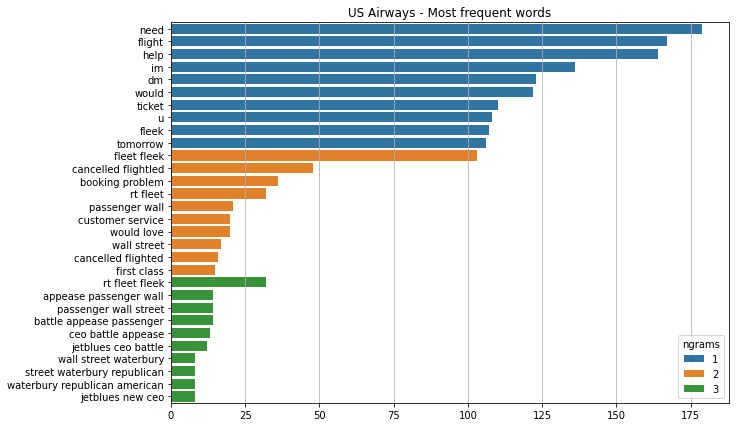

# positive:


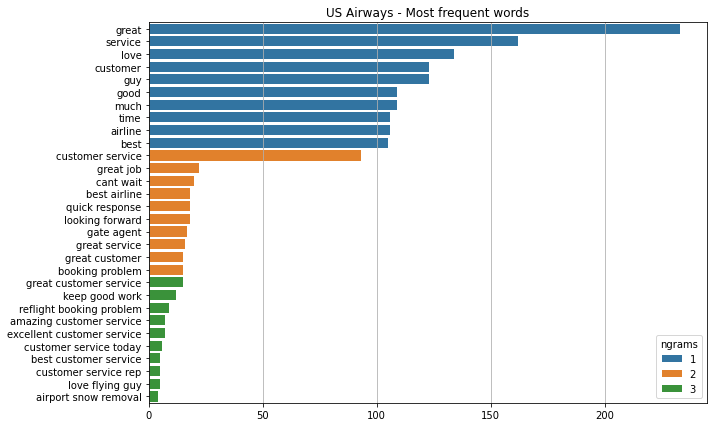

# negative:


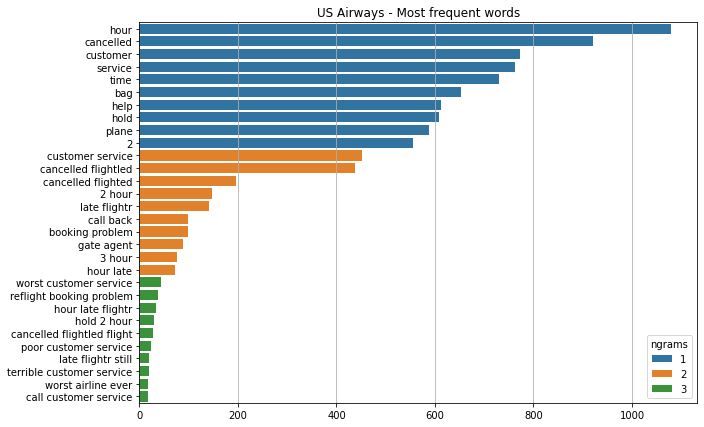






				########SOUTHWEST########
244
# negative:
  . selected features: 76
  . top features: hour,hold,cancelled,cancelled flightled,flightled,imaginedragons,hold hour,awesome,great,luggage
 
# neutral:
  . selected features: 87
  . top features: destinationdragons,imaginedragons,winner,imaginedragons destinationdragons,question,hour,chance,winner destinationdragons,follow send,hold
 
# positive:
  . selected features: 116
  . top features: great,awesome,much,amazing,appreciate,crew,best,rock,guy,best airline
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


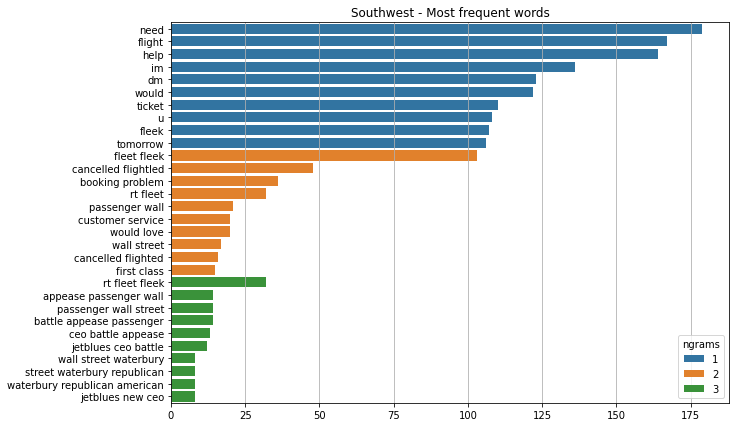

# positive:


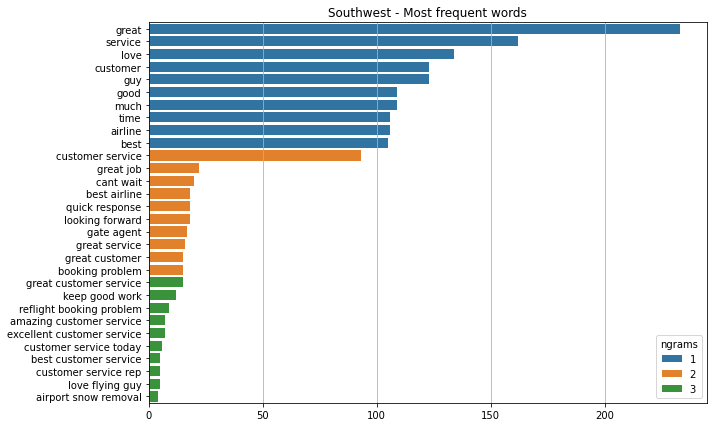

# negative:


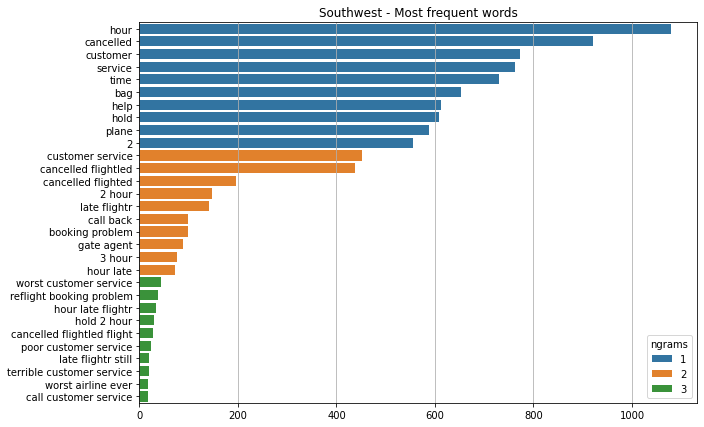






				########DELTA########
168
# negative:
  . selected features: 56
  . top features: hour,delayed,great,delay,fleet,fleet fleek,fleek,stop,awesome,love
 
# neutral:
  . selected features: 56
  . top features: fleek,fleet,fleet fleek,great,hi,dc,sent,journal,via,nantucket
 
# positive:
  . selected features: 82
  . top features: great,awesome,love,much,best,rock,guy rock,fleek,fleet,fleet fleek
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


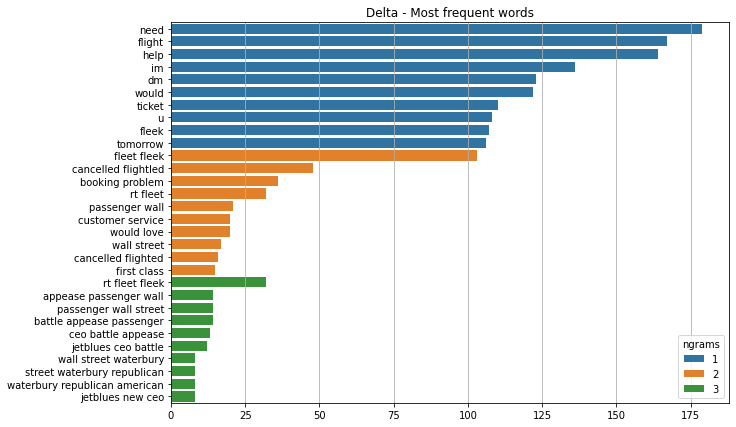

# positive:


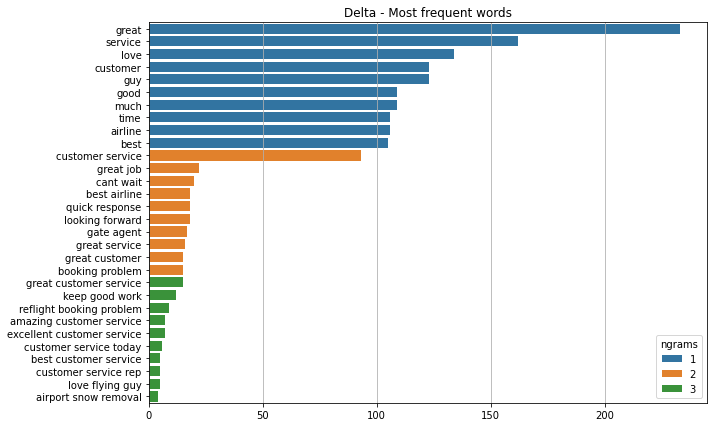

# negative:


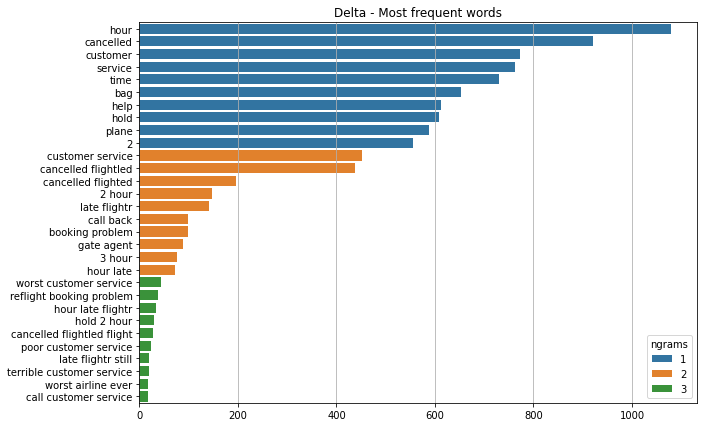






				########AMERICAN########
959
# negative:
  . selected features: 104
  . top features: great,awesome,dm,much,photo,check dm,follow,hour,call,youyou
 
# neutral:
  . selected features: 332
  . top features: dm,check dm,httptcovmquurzupw,photo httptcovmquurzupw,expecting,hi,south,follow,dm info,robertsamps1
 
# positive:
  . selected features: 599
  . top features: awesome,great,much,youyou,much appreciated,got another,good,love,good work,keep good
 
# neutral:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


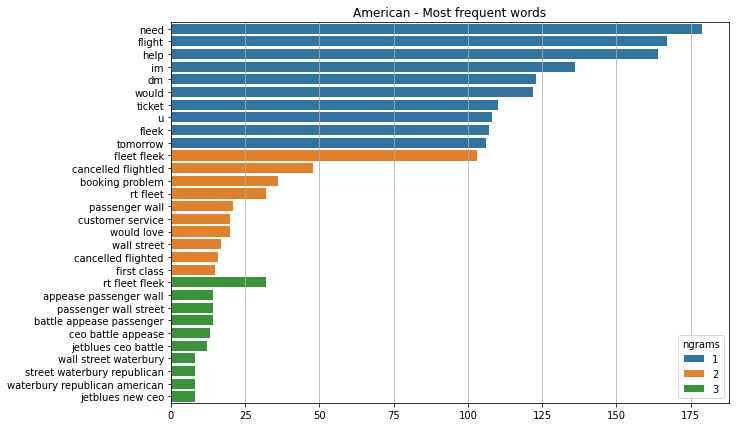

# positive:


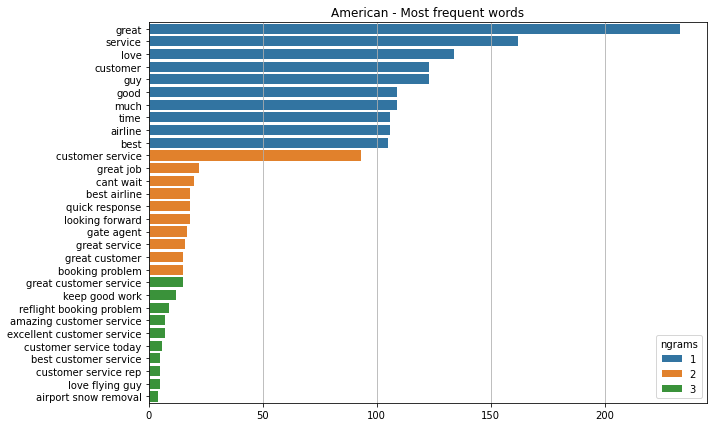

# negative:


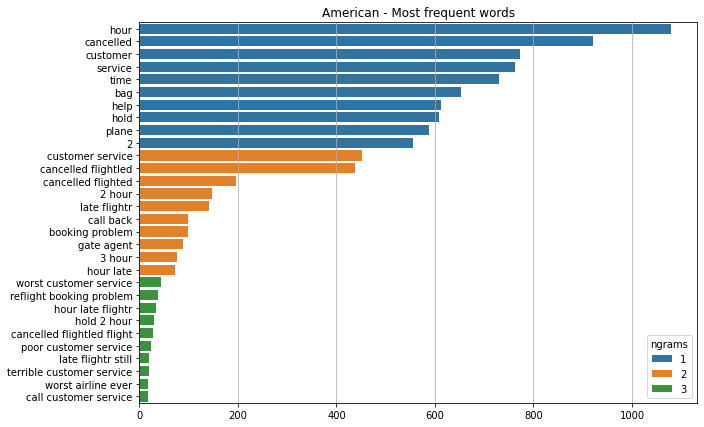

In [137]:
def BagOfWords(airline, name):
  # split dataset
  dtf_train, dtf_test = model_selection.train_test_split(airline, test_size=0.3)

  # get output
  y_train = dtf_train["airline_sentiment"].values
  y_test = dtf_test["airline_sentiment"].values

  vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

  corpus = dtf_train["text_clean"]

  vectorizer.fit(corpus)
  X_train = vectorizer.transform(corpus)
  dic_vocabulary = vectorizer.vocabulary_

  y = dtf_train["airline_sentiment"]
  X_names = vectorizer.get_feature_names()
  p_value_limit = 0.85
  dtf_features = pd.DataFrame()
  for cat in np.unique(y):
      chi2, p = feature_selection.chi2(X_train, y==cat)
      dtf_features = dtf_features.append(pd.DataFrame(
                    {"feature":X_names, "score":1-p, "airline_sentiment":cat}))
      dtf_features = dtf_features.sort_values(["airline_sentiment","score"], 
                      ascending=[True,False])
      dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
      
  X_names = dtf_features["feature"].unique().tolist()
  print(len(X_names))

  for cat in np.unique(dtf_train["airline_sentiment"]):
    print("# {}:".format(cat))
    print("  . selected features:",
          len(dtf_features[dtf_features["airline_sentiment"]==cat]))
    print("  . top features:", ",".join(
    dtf_features[dtf_features["airline_sentiment"]==cat]["feature"].values[:10]))
    print(" ")

  def word_freq(corpus, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel=None, ylabel=None, title= name + " - Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return dtf_freq

  dtf_freq = pd.DataFrame()
  for y in dtf["airline_sentiment"].unique():
      print("# {}:".format(y))
      dtf_y = word_freq(corpus=dtf[dtf["airline_sentiment"]==y]["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
      dtf_y["airline_sentiment"] = y
      dtf_freq = dtf_freq.append(dtf_y)


  return dtf_freq
print("\t\t\t\t########UNITED########")
united_freq = BagOfWords(dtf_united, "United")
print("\n\n\n\n\n\t\t\t\t########VIRGIN AMERICA########")
VA_freq = BagOfWords(dtf_VA, "Virgin America")
print("\n\n\n\n\n\t\t\t########US Airways########")
UA_freq = BagOfWords(dtf_UA, "US Airways")
print("\n\n\n\n\n\t\t\t\t########SOUTHWEST########")
southwest_freq = BagOfWords(dtf_southwest, "Southwest")
print("\n\n\n\n\n\t\t\t\t########DELTA########")
delta_freq = BagOfWords(dtf_delta, "Delta")
print("\n\n\n\n\n\t\t\t\t########AMERICAN########")
american_freq = BagOfWords(dtf_american, "American")

In [138]:
def wordcloudPlot(airline, name, maxWords, sentiment):
  airplane_mask = np.array(Image.open("airplane.jpg"))
  words = united_freq[united_freq['airline_sentiment']==sentiment]
  words2 = words[words['ngrams']==2]
  words2 = words2[["word","freq"]]
  freq_dict = {}
  for row in words2.index:
    freq_dict[words2['word'][row]] = words2['freq'][row]

  wordCloud = wordcloud.WordCloud(background_color='lightblue', mask=airplane_mask, max_words=maxWords).generate_from_frequencies(freq_dict)
  plt.figure(num=1, figsize=(15,10))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.title(f"Word Cloud for {name}s most {sentiment} tweets")
  plt.axis("off")
  plt.show


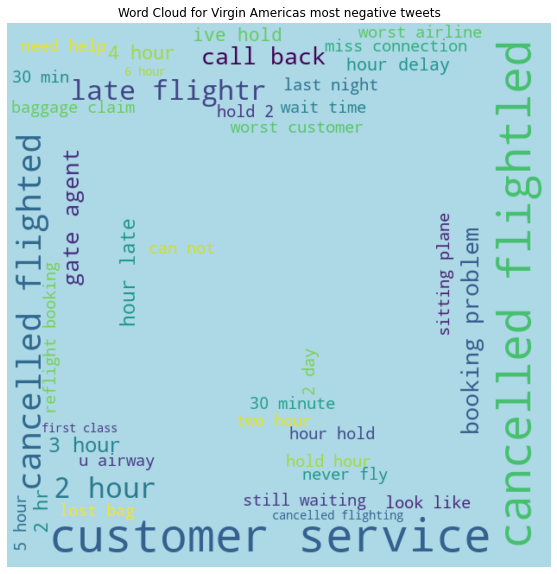

In [139]:
wordcloudPlot(VA_freq, "Virgin America", 40, "negative")

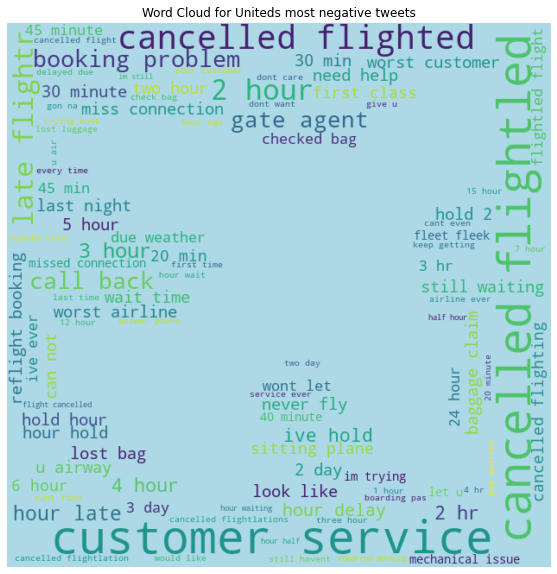

In [140]:
wordcloudPlot(united_freq, "United", 100, "negative")

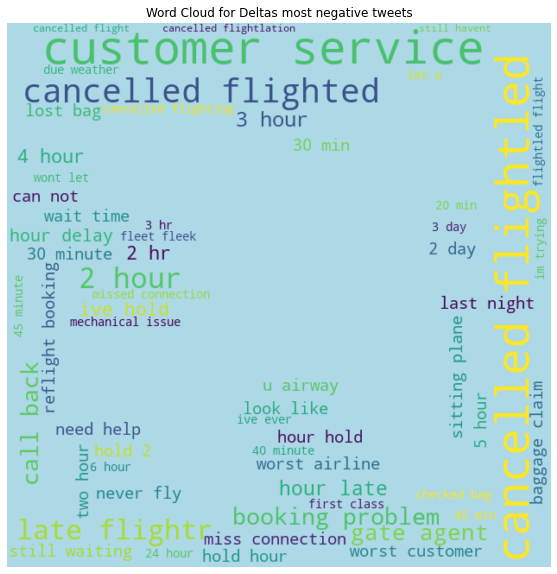

In [141]:
wordcloudPlot(delta_freq, "Delta", 60, "negative")

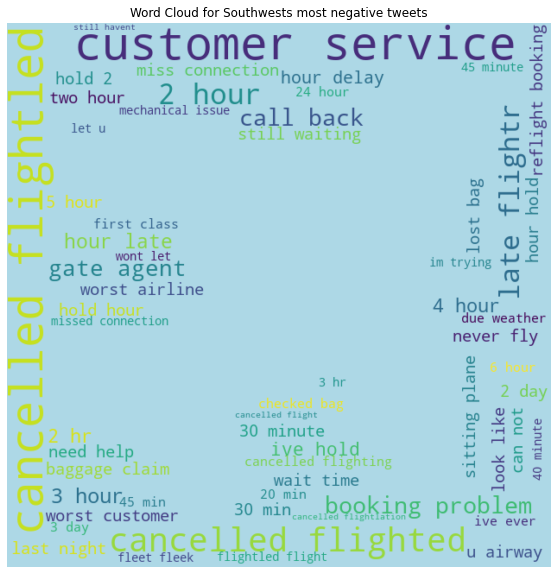

In [142]:
wordcloudPlot(southwest_freq, "Southwest", 60, "negative")

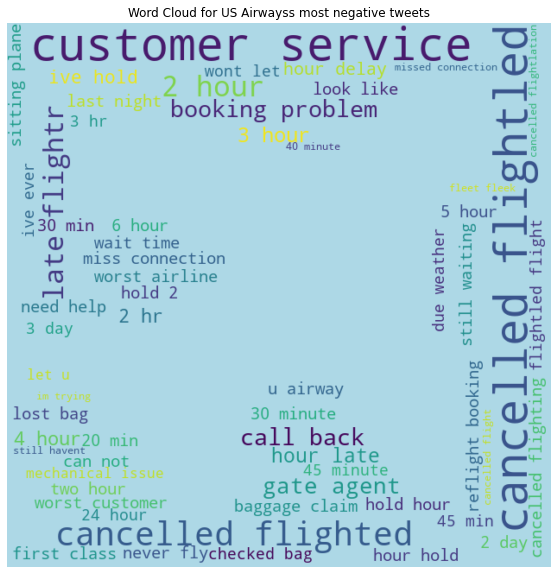

In [143]:
wordcloudPlot(UA_freq, "US Airways", 60, "negative")

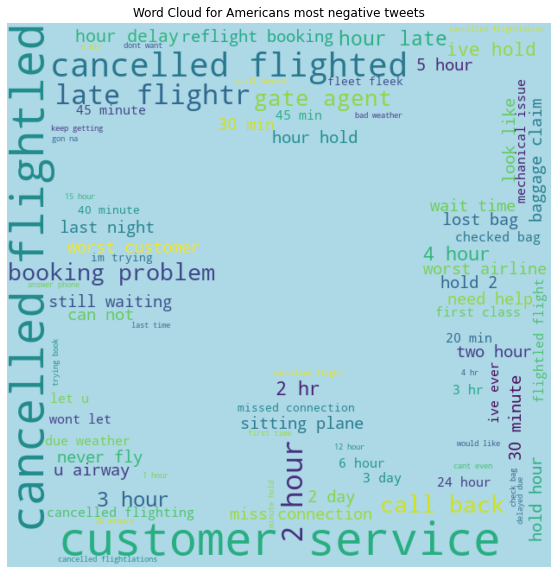

In [144]:
wordcloudPlot(american_freq, "American", 80, "negative")

In [145]:
dtf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_clean
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),dhepburn said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing


In [146]:
dtf['negativereason']

0                           NaN
1                           NaN
2                           NaN
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                       NaN
14636    Customer Service Issue
14637                       NaN
14638    Customer Service Issue
14639                       NaN
Name: negativereason, Length: 14640, dtype: object

In [147]:
reasons = dtf['negativereason'].unique()
figNum = 0
reasons

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [151]:
def plot_piechart(airline, name, figNum):
  dictReasons = dict.fromkeys(reasons)
  for value in dictReasons:
    dictReasons[value] = 0
  for reason in airline['negativereason']:
    dictReasons[reason] = dictReasons[reason] + 1

  for item in dictReasons:
    if (np.isnan(item)):
      dictReasons.pop(item)
      break

  labels = list(dictReasons.keys())
  values = list(dictReasons.values())
  explode = [0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0]
  fig1, ax1 = plt.subplots()
  wedges, plt_labels, junk = plt.pie(values, explode=explode, labels = labels, autopct= '%1.1f%%', shadow=True, radius = 3, startangle=45, rotatelabels=True)
  plt.legend(wedges, labels, bbox_to_anchor=(2,2), prop={'size':10})
  figNum = figNum + 1
  plt.suptitle(f"Figure {figNum}: Negative reason ditribution for {name}", y=1.7)
  plt.show

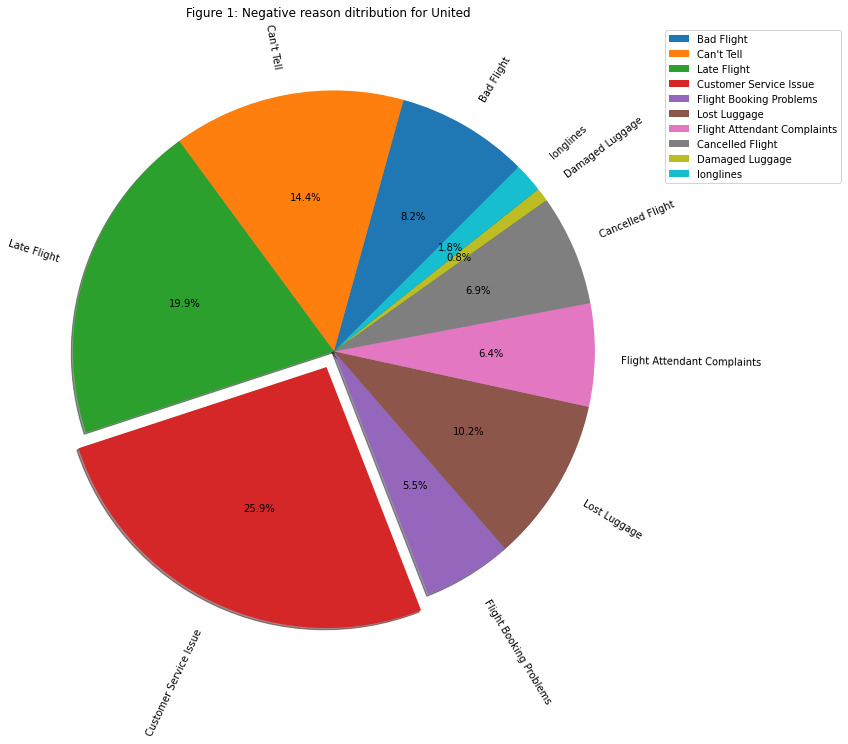

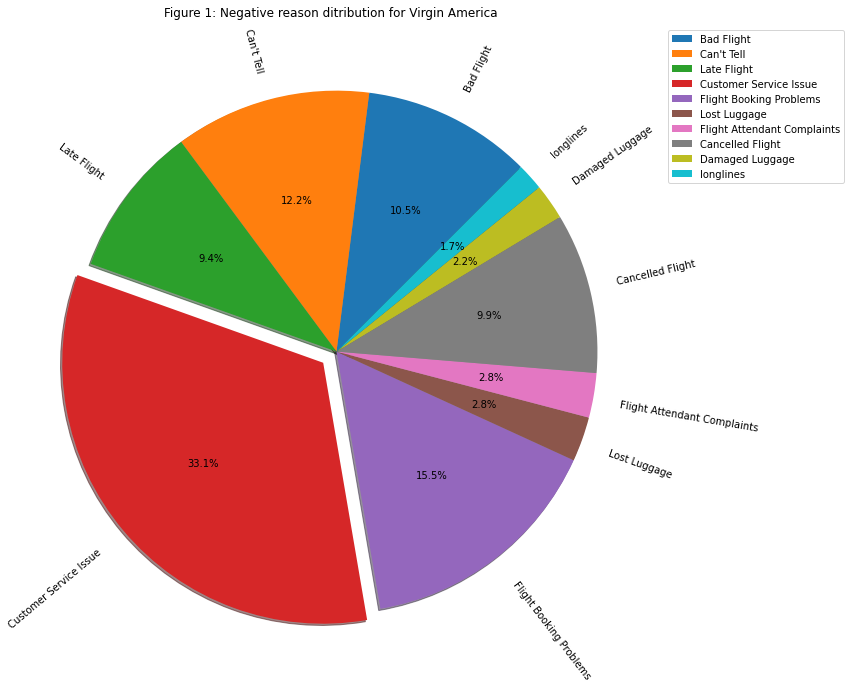

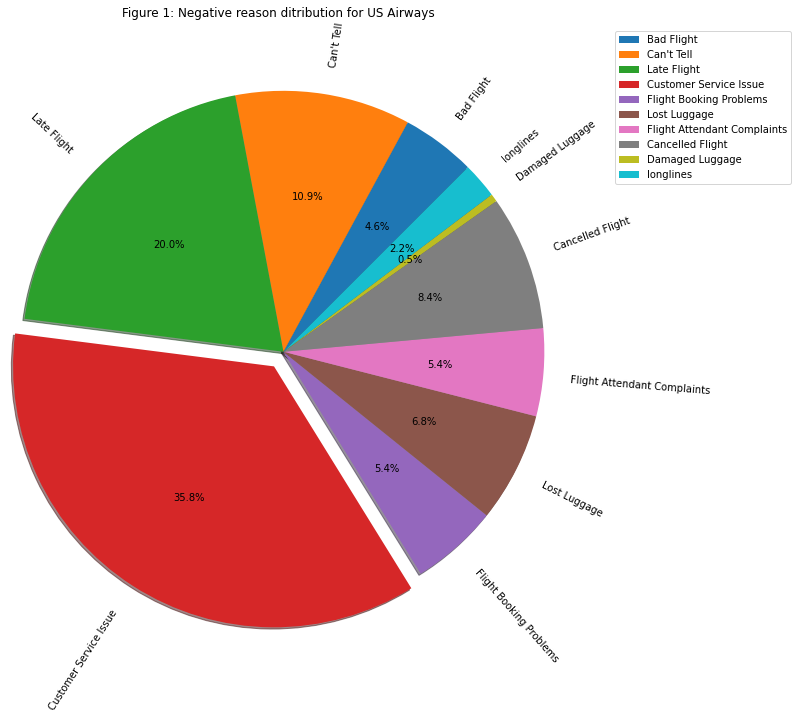

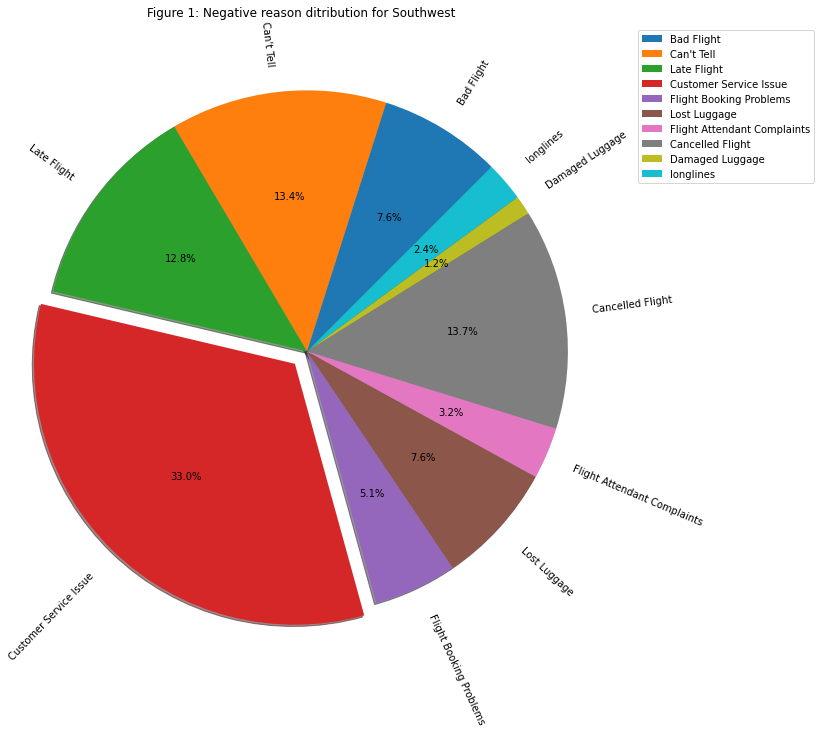

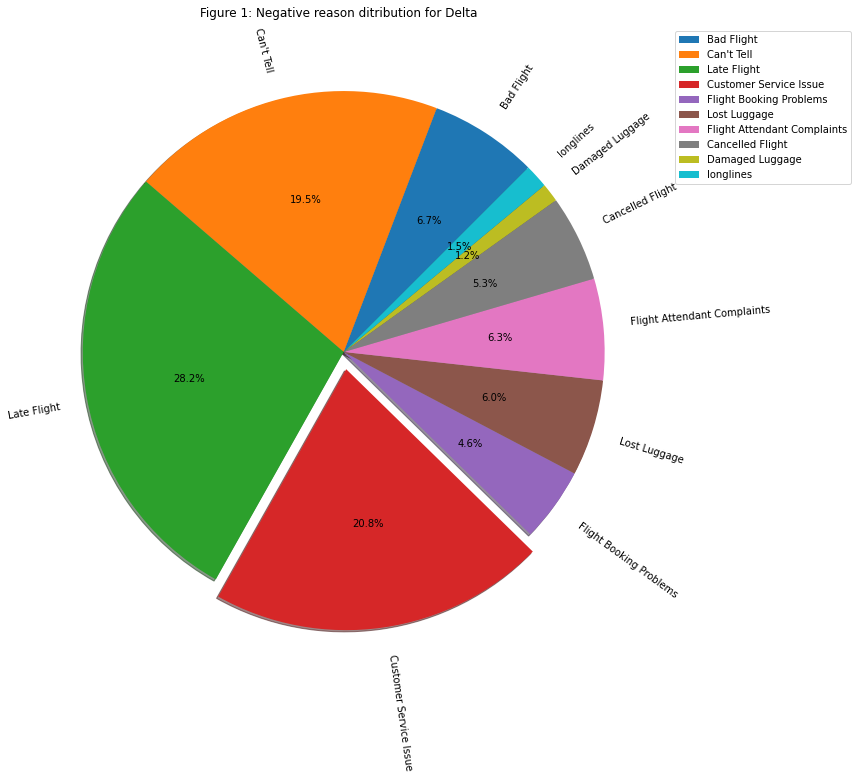

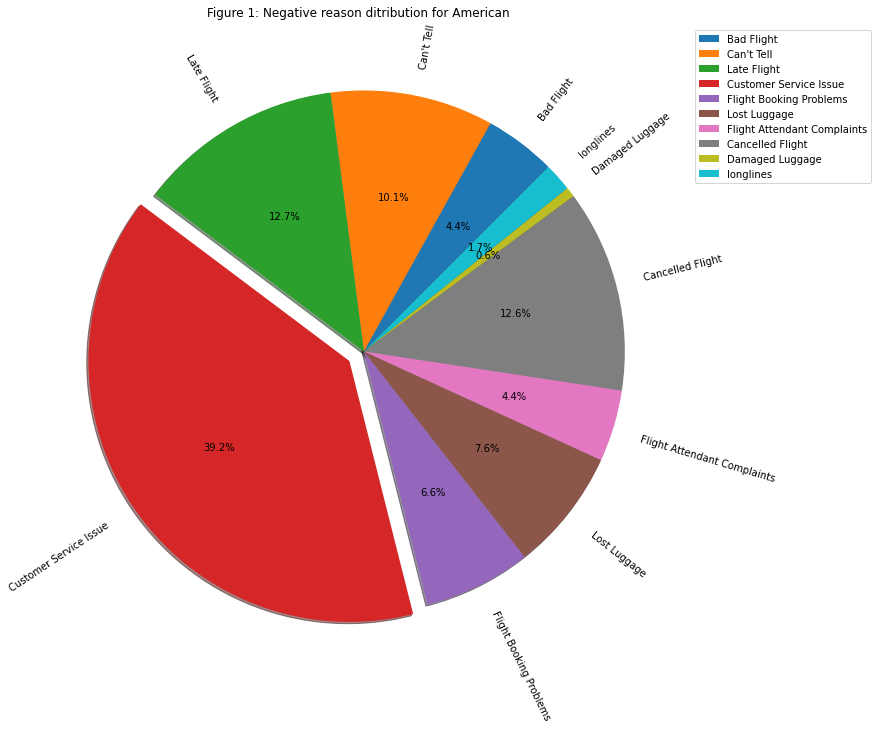

In [153]:
plot_piechart(dtf_united, "United", figNum)
plot_piechart(dtf_VA, "Virgin America", figNum)
plot_piechart(dtf_UA, "US Airways", figNum)
plot_piechart(dtf_southwest, "Southwest", figNum)
plot_piechart(dtf_delta, "Delta", figNum)
plot_piechart(dtf_american, "American", figNum)